3IIR GROUP 3 KARZOUZ SAAD , EL HOUFI ACHRAF , LAMBRASS YASSIR , EL MALYARI ANAS 

 Tout d'abord , on a importer la bibliothèque Pandas permet de travailler avec des DataFrames et la bibliothèque Matplotlib, utilisée pour la visualisation de données pour créer divers types de graphiques 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Ensuite, on lit le fichier CSV "amazon.csv" et crée un DataFrame Pandas nommé "data"

In [2]:
data = pd.read_csv('amazon.csv')

Pour explorer les 5 meilleures catégories , On accède à la colonne "listed_in" du DataFrame data qui contient les catégories de chaque film ou série.
Chaque cellule de cette colonne peut contenir plusieurs catégories séparées par des virgules et on utilise la méthode value_counts() de Pandas qui compte le nombre d'occurrences de chaque valeur unique dans la colonne "listed_in" qu 'elle crée une Series Pandas où l'index est constitué des valeurs uniques (les catégories) et les valeurs correspondent à leur nombre d'occurrences.et en sélectionnant les cinq premières avec head() 

In [3]:
top_categories = data['listed_in'].value_counts().head()
print("Top 5 des catégories :\n", top_categories)

Top 5 des catégories :
 listed_in
Drama              986
Comedy             536
Drama, Suspense    399
Comedy, Drama      377
Animation, Kids    356
Name: count, dtype: int64


Pour explorer les 5 meilleurs réalisateurs , comme le code precedent , on accède à la colonne "director" du DataFrame data qui contient le nom du réalisateur de chaque film ou série et la méthode value_counts() compte le nombre de films ou de séries réalisés par chaque réalisateur unique et head() sélectionne les 5 premières lignes de la Series

In [4]:
top_directors = data['director'].value_counts().head()
print("\nTop 5 des réalisateurs :\n", top_directors)



Top 5 des réalisateurs :
 director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: count, dtype: int64


Pour explorer les 10 meilleurs acteurs , il nécessite un traitement supplémentaire en raison de plusieurs acteurs répertoriés dans une seule ligne , alors on initialise une liste vide nommée all_actors. Cette liste servira à stocker tous les noms d'acteurs extraits du DataFrame.on utilise la boucle for actors in data['cast']: pour parcourt chaque cellule de la colonne "cast" du DataFrame data.et la méthode actors.split(', ') divise la chaîne de caractères actors en une liste de noms d'acteurs en utilisant la virgule et l'espace comme séparateur.Et pour ajouter tous les éléments de la liste créée à la liste all_actors on a utiliser extend . À la fin de la boucle, la liste all_actors contiendra donc tous les noms d'acteurs présents dans le DataFrame, sans doublons.Enfin,les 10 meilleurs acteurs et leurs nombres d'occurrences  sont stockés dans top_actors.


In [5]:
all_actors = []
for actors in data['cast']:
    if isinstance(actors, str):  
        all_actors.extend(actors.split(', '))
top_actors = pd.Series(all_actors).value_counts().head(10)
print("\n10 meilleurs acteurs :\n", top_actors)


10 meilleurs acteurs :
 Maggie Binkley        56
1                     35
Gene Autry            32
Nassar                30
Champion              29
Anne-Marie Newland    25
Prakash Raj           24
John Wayne            23
Roy Rogers            23
Danny Trejo           22
Name: count, dtype: int64


Pour explorer les 5 meilleures émissions de télévision avec le plus de saisons , on commence par extraire les données relatives aux émissions de télévision . Ensuite, on veut trouver les émissions de télévision les plus populaires , donc on a calculé le nombre de saisons pour chaque émission. Pour ce faire, on a compté combien de fois chaque durée de série TV apparaît dans les données. Ensuite, on a pris les cinq valeurs les plus fréquentes, c'est-à-dire les cinq durées de séries TV les plus courantes.

In [6]:
tv_shows = data[data['type'] == 'TV Show']
top_tv_shows_by_season = tv_shows['duration'].value_counts().head()
print("\nLes 5 meilleures émissions de télévision avec le plus de saisons :\n", top_tv_shows_by_season)


Les 5 meilleures émissions de télévision avec le plus de saisons :
 duration
1 Season     1342
2 Seasons     229
3 Seasons     110
4 Seasons      62
5 Seasons      39
Name: count, dtype: int64


Amazon se concentre-t-il davantage sur les émissions de télévision que sur les films ces dernières années ?
On commence par créer une nouvelle colonne dans notre ensemble de données pour stocker l'année d'ajout de chaque élément. Pour ce faire, on convertit d'abord la colonne 'date_added' en format de date, puis on extrait l'année. Ensuite, on sélectionne seulement les éléments qui ont été ajoutés en 2018 ou après. On compte ensuite combien d'émissions de télévision et de films ont été ajoutés au cours de ces dernières années en utilisant la méthode 'value_counts' pour obtenir le décompte du type de contenu.

In [7]:
data['year_added'] = pd.to_datetime(data['date_added']).dt.year
recent_years = data[data['year_added'] >= 2018]
content_type_counts = recent_years['type'].value_counts()
print("\nNombre d'émissions de télévision et de films ajoutés au cours des dernières années :\n", content_type_counts)


Nombre d'émissions de télévision et de films ajoutés au cours des dernières années :
 type
TV Show    139
Movie       16
Name: count, dtype: int64


Visualisation de la tendance à l'aide d'un graphique à barres
On utilise la fonction 'bar' de la bibliothèque 'pyplot' pour créer un diagramme en barres. On utilise les index des décomptes ('content_type_counts.index') comme valeurs sur l'axe des x, et les décomptes eux-mêmes ('content_type_counts.values') comme valeurs sur l'axe des y. On ajoute des étiquettes appropriées pour les axes x et y en utilisant les fonctions 'xlabel' et 'ylabel'. On donne également un titre au graphique avec 'title'

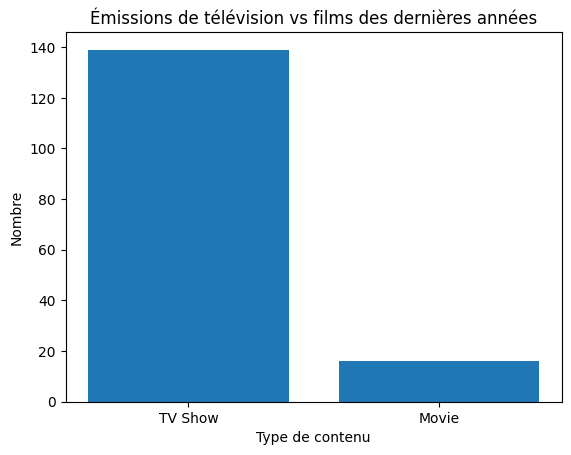

In [8]:
plt.bar(content_type_counts.index, content_type_counts.values)
plt.xlabel("Type de contenu")
plt.ylabel("Nombre")
plt.title("Émissions de télévision vs films des dernières années")
plt.show()

Distribution des notations
On calcule d'abord la distribution des notations en pourcentage en utilisant la fonction 'value_counts' pour obtenir le décompte de chaque notation dans la colonne 'rating'. On divise ensuite ces décomptes par le nombre total de notations et on multiplie par 100 pour obtenir les pourcentages. 

In [9]:
ratings_distribution = data['rating'].value_counts(normalize=True) * 100
print("\nDistribution des notations (en pourcentage) :\n", ratings_distribution)


Distribution des notations (en pourcentage) :
 rating
13+         22.687815
16+         16.579145
ALL         13.589112
18+         13.321187
R           10.824135
PG-13        4.211767
7+           4.126032
PG           2.711392
NR           2.389883
TV-14        2.229129
TV-PG        1.811167
TV-NR        1.125281
G            0.996678
TV-G         0.868074
TV-MA        0.825206
TV-Y         0.793055
TV-Y7        0.417962
UNRATED      0.353660
NC-17        0.032151
AGES_18_     0.032151
NOT_RATE     0.032151
AGES_16_     0.021434
16           0.010717
ALL_AGES     0.010717
Name: proportion, dtype: float64


Visualisation de la distribution des notations à l'aide d'un diagramme circulaire ou diagramme à secteurs
On utilise la fonction 'pie' de la bibliothèque 'pyplot' pour créer un diagramme circulaire. On utilise les valeurs de la distribution des notations ('ratings_distribution.values') comme données pour le diagramme et les index des décomptes ('ratings_distribution.index') comme étiquettes. L'argument 'autopct' permet de formater les pourcentages affichés sur les portions du diagramme. On ajoute un titre au diagramme avec 'title'.

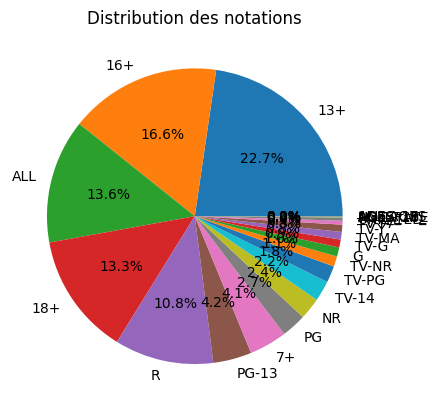

In [10]:
plt.pie(ratings_distribution.values, labels=ratings_distribution.index, autopct='%1.1f%%')
plt.title("Distribution des notations")
plt.show()

Contenu ajouté au fil du temps
On commence par créer une nouvelle colonne dans notre ensemble de données pour stocker l'année d'ajout de chaque élément. Pour ce faire, on convertit d'abord la colonne 'date_added' en format de date, puis on extrait l'année. Ensuite, on compte combien d'éléments ont été ajoutés chaque année en utilisant la méthode 'value_counts' sur la colonne contenant les années d'ajout.

In [11]:
data['year_added'] = pd.to_datetime(data['date_added']).dt.year
content_over_time = data['year_added'].value_counts()
print("\nContenu ajouté au fil du temps :\n", content_over_time)


Contenu ajouté au fil du temps :
 year_added
2021.0    155
Name: count, dtype: int64


Meilleurs pays producteurs de contenu
On commence par compter le nombre d'occurrences de chaque pays dans la colonne 'country' de notre ensemble de données. Ensuite, on sélectionne les cinq pays les plus fréquemment mentionnés en utilisant la méthode 'head()'. Ces pays représentent donc les principaux producteurs de contenu dans notre ensemble de données.

In [12]:
top_countries = data['country'].value_counts().head()
print("\nTop 5 des pays producteurs de contenu :\n", top_countries)


Top 5 des pays producteurs de contenu :
 country
United States                    253
India                            229
United Kingdom                    28
Canada                            16
United Kingdom, United States     12
Name: count, dtype: int64


Visualisation des meilleurs pays à l'aide d'un graphique à barres horizontales
On utilise la fonction 'barh' de la bibliothèque 'pyplot' pour créer un diagramme à barres horizontales. On utilise les index des cinq principaux pays producteurs ('top_countries.index') comme étiquettes sur l'axe des y et les valeurs correspondantes ('top_countries.values') comme longueurs des barres sur l'axe des x. On ajoute des étiquettes appropriées pour les axes x et y en utilisant les fonctions 'xlabel' et 'ylabel'. On donne également un titre au graphique avec 'title'.

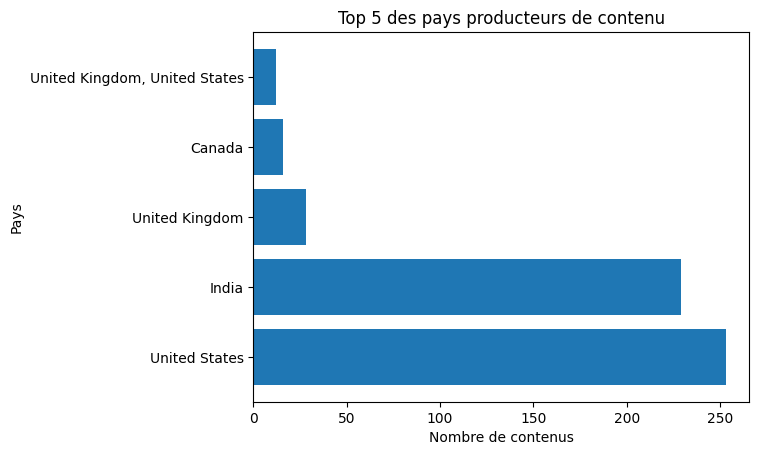

In [13]:
plt.barh(top_countries.index, top_countries.values)
plt.xlabel("Nombre de contenus")
plt.ylabel("Pays")
plt.title("Top 5 des pays producteurs de contenu")
plt.show()

 Durée moyenne du contenu par type
 On définit d'abord une fonction nommée 'extract_minutes' qui extrait les minutes à partir d'une chaîne de durée donnée. Cette fonction vérifie d'abord si la durée est une chaîne de caractères, puis elle extrait la partie numérique et tente de la convertir en entier. En cas d'échec de conversion, elle retourne 0. Ensuite, on applique cette fonction à la colonne 'duration' de notre ensemble de données pour créer une nouvelle colonne appelée 'duration_minutes' qui contient la durée en minutes pour chaque élément. On regroupe ensuite les données par type ('TV Show' ou 'Movie') et on calcule la durée moyenne en minutes pour chaque type.

In [14]:
def extract_minutes(duration_str):
    
    if isinstance(duration_str, str):
        minutes_str = duration_str.split(' ')[0]  
        try:
            minutes = int(minutes_str)  
        except ValueError:
            minutes = 0  
    else:
        minutes = 0  
    return minutes

data['duration_minutes'] = data['duration'].apply(extract_minutes)
average_duration_by_type = data.groupby('type')['duration_minutes'].mean()
print("\nDurée moyenne du contenu par type :\n", average_duration_by_type)


Durée moyenne du contenu par type :
 type
Movie      91.311876
TV Show     1.723301
Name: duration_minutes, dtype: float64


Visualisation de la durée moyenne à l'aide d'un graphique à barres groupées
On utilise la fonction 'bar' de la bibliothèque 'pyplot' pour créer un diagramme en barres. On utilise les types de contenu ('Film' et 'Émission de télévision') comme valeurs sur l'axe des x et les durées moyennes correspondantes ('average_duration_by_type.values') comme hauteurs des barres sur l'axe des y. On ajoute des étiquettes appropriées pour les axes x et y en utilisant les fonctions 'xlabel' et 'ylabel'. On donne également un titre au graphique avec 'title'. 

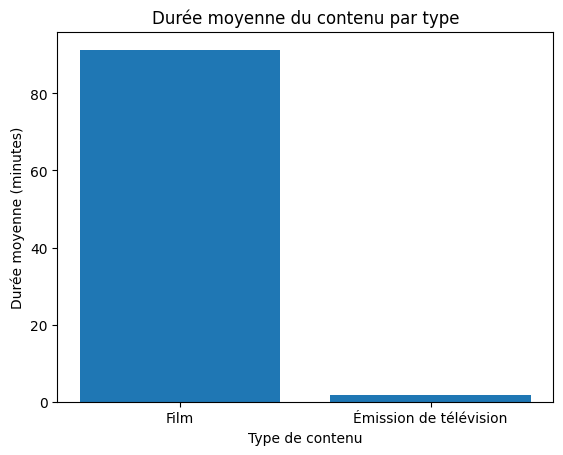

In [15]:
plt.bar(['Film', 'Émission de télévision'], average_duration_by_type.values)
plt.xlabel("Type de contenu")
plt.ylabel("Durée moyenne (minutes)")
plt.title("Durée moyenne du contenu par type")
plt.show()

Principaux fonctions de de la bibliothèque matplotlib.pyplot qu on a utilisé:

plt.bar() : Cette fonction de la bibliothèque matplotlib permet de créer un diagramme en barres. Elle prend en entrée les valeurs pour l'axe des x et les hauteurs des barres pour l'axe des y.

plt.barh() : Similaire à plt.bar(), cette fonction crée un diagramme en barres horizontales. Elle prend en entrée les valeurs pour l'axe des y et les longueurs des barres pour l'axe des x.

plt.pie() : Cette fonction crée un diagramme circulaire (ou un graphique en secteurs) à partir d'une série de données. Elle prend en entrée les valeurs pour chaque portion du diagramme et les étiquettes correspondantes.

plt.xlabel() : Cette fonction définit le label (étiquette) de l'axe des x d'un graphique. Elle prend en argument le texte à afficher comme label pour l'axe des x.

plt.ylabel() : Cette fonction définit le label de l'axe des y d'un graphique. Elle prend en argument le texte à afficher comme label pour l'axe des y.

plt.title() : Cette fonction définit le titre d'un graphique. Elle prend en argument le texte à afficher comme titre pour le graphique.

plt.show() : Cette fonction affiche le graphique. Elle est utilisée à la fin de la création du graphique pour le rendre visible à l'utilisateur.